In [1]:
# 📥 Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

In [2]:
sys.path.append(os.path.abspath(".."))

In [3]:
from src.preprocessing import load_raw_dataset, aggregate_hourly, scale_to_thousands, clean_series

In [4]:
# --- Paths ---
RAW_PATH = Path("../data/raw/Multivariate-Mobility-Paris.csv")
PROC_DIR = Path("../data/processed/")
PROC_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# 📂 Load dataset
df = load_raw_dataset(RAW_PATH)
print("Raw dataset shape:", df.shape)
df.head()

Raw dataset shape: (3456, 6)


,R1,R2,R3,R4,R5,R6
Datetime,,,,,,
2020-08-24 00:00:00,100209,9885,11802,8783,2893,9076
2020-08-24 00:30:00,95213,11148,12184,8286,2895,9034
2020-08-24 01:00:00,85383,9647,9769,6320,1681,8104
2020-08-24 01:30:00,79010,6530,12188,6967,2413,8333
2020-08-24 02:00:00,74321,7071,12501,5720,2812,1696


In [6]:
# --- Aggregate to hourly resolution ---
df_hourly = aggregate_hourly(df)
print("Hourly dataset shape:", df_hourly.shape)
df_hourly.head()

Hourly dataset shape: (1752, 6)


c:\Users\Usuario\Documents\mobile-traffic-forecasting\src\preprocessing.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample("1H").sum()


,R1,R2,R3,R4,R5,R6
Datetime,,,,,,
2020-08-24 00:00:00,195422,21033,23986,17069,5788,18110
2020-08-24 01:00:00,164393,16177,21957,13287,4094,16437
2020-08-24 02:00:00,146456,14391,25695,11237,5851,3126
2020-08-24 03:00:00,139325,14278,26725,12247,5688,2762
2020-08-24 04:00:00,128718,9675,21466,14500,4934,2438


In [16]:
# Clean R1 (replace zeros with NaN + interpolate)
df_clean = df_hourly.copy()
for col in df_clean.columns:
    df_clean = clean_series(df_clean, col=col)

In [17]:
# --- Scale series (users in thousands) ---
df_scaled = scale_to_thousands(df_clean)
print("Scaled dataset sample:")
df_scaled.head()

Scaled dataset sample:


,R1,R2,R3,R4,R5,R6
Datetime,,,,,,
2020-08-24 00:00:00,195.422,21.033,23.986,17.069,5.788,18.110
2020-08-24 01:00:00,164.393,16.177,21.957,13.287,4.094,16.437
2020-08-24 02:00:00,146.456,14.391,25.695,11.237,5.851,3.126
2020-08-24 03:00:00,139.325,14.278,26.725,12.247,5.688,2.762
2020-08-24 04:00:00,128.718,9.675,21.466,14.500,4.934,2.438


In [22]:
# --- Save processed dataset ---

proc_file = PROC_DIR / "series_hourly.csv"
df_scaled.to_csv(proc_file, index=True)
print(f"Processed dataset saved at {proc_file}")

Processed dataset saved at ..\data\processed\series_hourly.csv


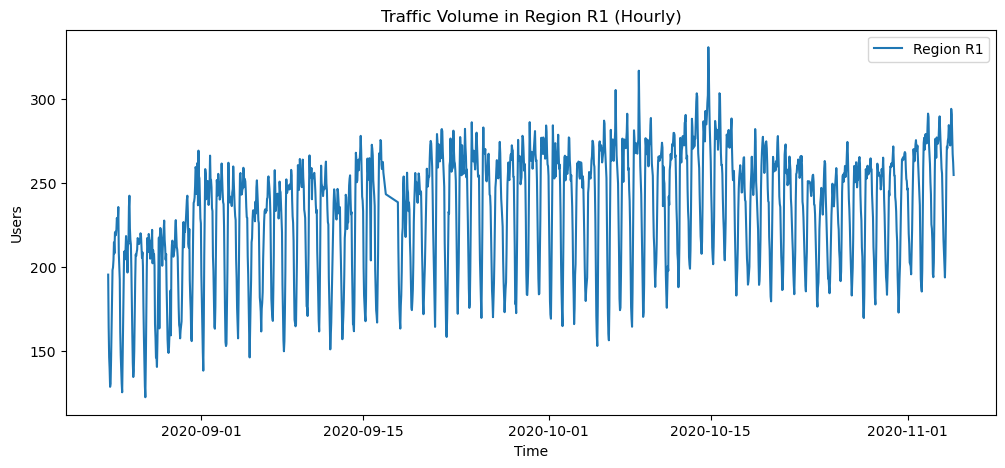

In [23]:
# --- Exploratory plots ---
plt.figure(figsize=(12, 5))
plt.plot(df_scaled["R1"], label="Region R1")
plt.title("Traffic Volume in Region R1 (Hourly)")
plt.xlabel("Time")
plt.ylabel("Users")
plt.legend()
plt.show()

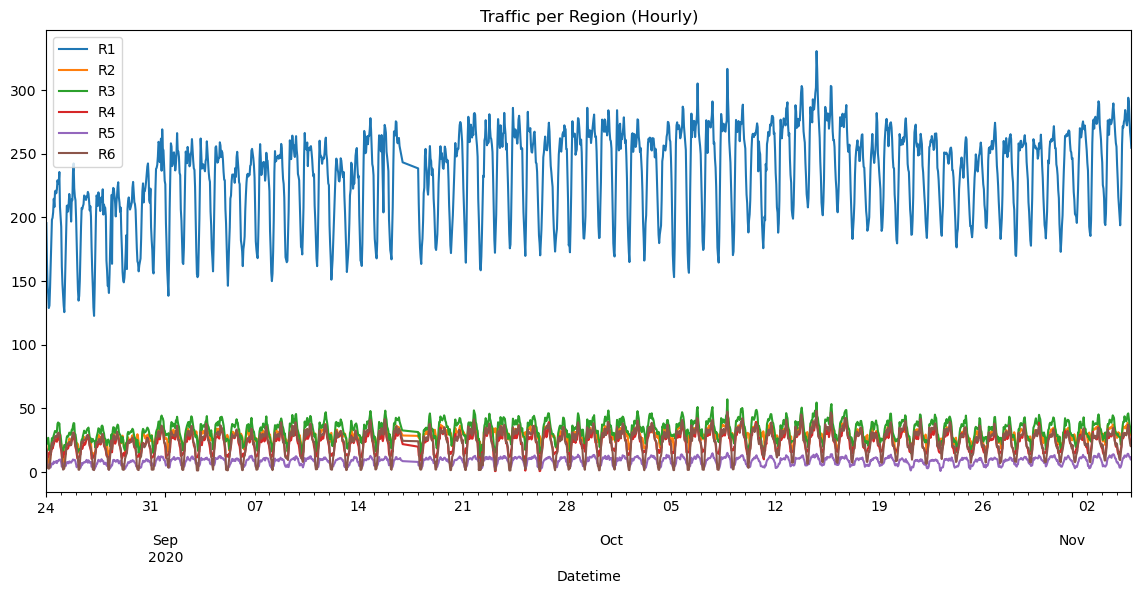

In [24]:
# Plot all regions
df_scaled[["R1", "R2", "R3", "R4", "R5", "R6"]].plot(
    figsize=(14, 6), title="Traffic per Region (Hourly)"
)
plt.show()

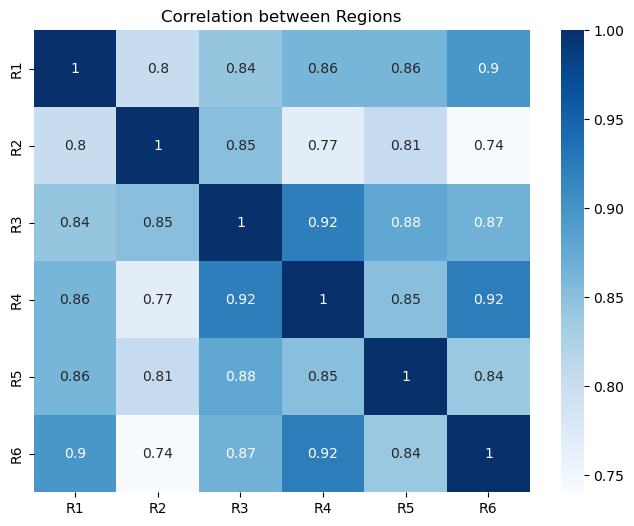

In [25]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="Blues")
plt.title("Correlation between Regions")
plt.show()